In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
import pickle

#kmeans
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples

#dbscan
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

#agglomeraive clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import *

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.drop(columns=['CUST_ID'],inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [8]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
df.shape

(8636, 17)

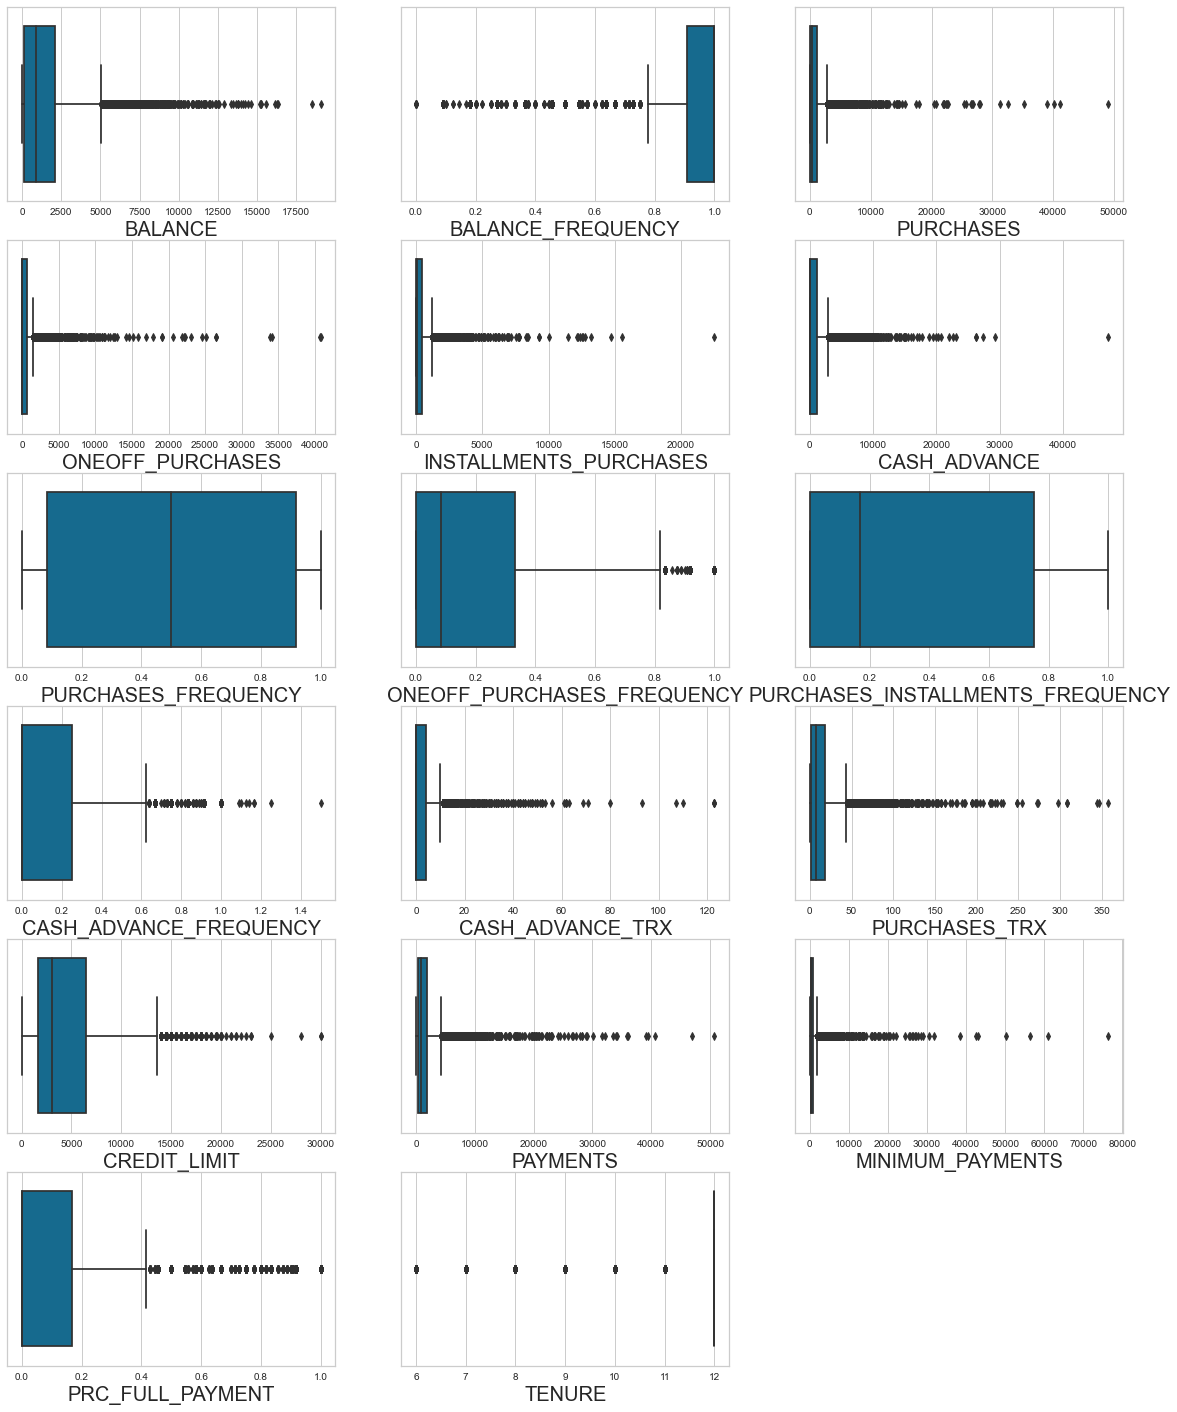

In [12]:
plt.figure(figsize=(20,25))
plt_no = 1
for col in df:
    if plt_no<=20:
        ax = plt.subplot(6,3,plt_no)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plt_no+=1

In [13]:
df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [14]:
df.shape

(8636, 17)

# KMeans

In [15]:
ss = StandardScaler()
ss_x = ss.fit_transform(df)

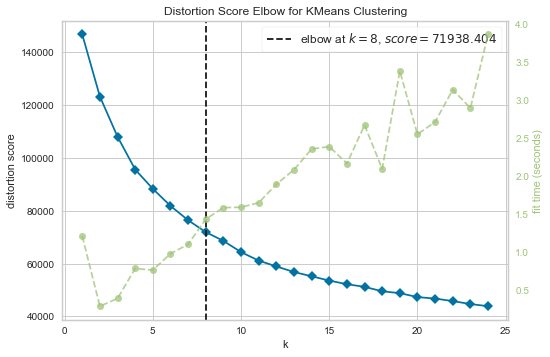

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
kmc = KMeans()
elbow = KElbowVisualizer(kmc,k=(1,25))
elbow.fit(ss_x)
elbow.show()

In [16]:
kmc = KMeans(n_clusters=8)
out_kmc = kmc.fit_predict(ss_x)
out_kmc

array([2, 0, 3, ..., 7, 7, 7])

In [17]:
kmc.inertia_

71561.61472229518

In [18]:
kmc.n_iter_

36

In [19]:
print(kmc.labels_)
n_clusters = len(set(kmc.labels_)) - (1 if -1 in kmc.labels_ else 0)
print(n_clusters)

[2 0 3 ... 7 7 7]
8


In [20]:
n_noise = list(kmc.labels_).count(-1)
n_noise

0

In [21]:
kmc.cluster_centers_

array([[ 1.68381627e+00,  3.75217794e-01, -2.23375148e-01,
        -1.60462731e-01, -2.33307080e-01,  2.00610219e+00,
        -4.83193072e-01, -2.20112836e-01, -4.19859152e-01,
         1.90155373e+00,  1.92468966e+00, -2.74989731e-01,
         1.03714883e+00,  8.02070650e-01,  5.15393015e-01,
        -4.09823920e-01,  6.52689497e-02],
       [-7.00284161e-01, -2.24090328e+00, -3.02580663e-01,
        -2.28326434e-01, -2.95653439e-01, -3.14176030e-01,
        -5.59023628e-01, -4.23721386e-01, -4.61101996e-01,
        -5.15253047e-01, -3.74244220e-01, -4.18296756e-01,
        -1.69775404e-01, -1.57111935e-01, -2.95895448e-01,
         4.02850493e-01,  2.11882651e-01],
       [ 2.56603628e-03,  3.92485968e-01, -3.61235196e-01,
        -2.44853408e-01, -4.03987212e-01, -9.83140956e-02,
        -8.59259261e-01, -3.95407624e-01, -7.62291604e-01,
         9.86899533e-02, -3.10820897e-02, -4.85160358e-01,
        -3.10289079e-01, -2.59081562e-01, -4.74541464e-03,
        -4.66354731e-01,  2.6

In [22]:
xx=list(df.iloc[0,:])
kmc.predict([xx])

array([6])

In [23]:
silhouette_score(ss_x,out_kmc)

0.22737900211704015

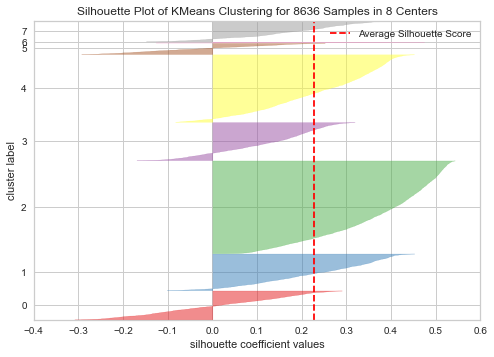

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8636 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [24]:
sv = SilhouetteVisualizer(kmc)
sv.fit(ss_x)
sv.show()

In [25]:
range_n_clusters = [2,3,4,5,6,7,8,9,10]
silscore = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(ss_x)
    silhouette_avg = silhouette_score(ss_x, cluster_labels)
    silscore.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(ss_x, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.20892328220228673
For n_clusters = 3 The average silhouette_score is : 0.18443788985318127
For n_clusters = 4 The average silhouette_score is : 0.1970633476945604
For n_clusters = 5 The average silhouette_score is : 0.1920721571918728
For n_clusters = 6 The average silhouette_score is : 0.20427648931868725
For n_clusters = 7 The average silhouette_score is : 0.21998466824406415
For n_clusters = 8 The average silhouette_score is : 0.22726773465495584
For n_clusters = 9 The average silhouette_score is : 0.2202539896237458
For n_clusters = 10 The average silhouette_score is : 0.2252108358086424


In [26]:
sample_silhouette_values

array([0.33665211, 0.02478553, 0.20633397, ..., 0.33278876, 0.34024451,
       0.31465686])

In [27]:
fname = 'credit_card_clustering_kmeans.pickle'
pickle.dump(kmc, open(fname, 'wb'))

# DBSCAN

In [28]:
ss = StandardScaler()
ss_x = ss.fit_transform(df)

In [29]:
db = DBSCAN(eps=0.5,min_samples=5) #0.5,5
out_db = db.fit_predict(ss_x)
out_db

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [30]:
db.core_sample_indices_

array([   3,    6,    9, ..., 8621, 8628, 8632], dtype=int64)

In [31]:
db.components_

array([[-0.37391041,  0.50540465, -0.46582465, ..., -0.26113056,
        -0.53772694,  0.35518066],
       [ 0.10614801,  0.50540465, -0.27191446, ..., -0.14005517,
        -0.53772694,  0.35518066],
       [-0.14703284,  0.50540465, -0.04859932, ...,  0.55149926,
        -0.53772694,  0.35518066],
       ...,
       [-0.74526833,  0.50540465, -0.39014338, ..., -0.32782468,
         2.8377577 , -4.22180042],
       [-0.70170434,  0.50540465, -0.20036796, ..., -0.3294234 ,
         2.8377577 , -4.22180042],
       [-0.7505459 ,  0.50540465, -0.3388647 , ..., -0.34370621,
         1.15001538, -4.22180042]])

In [32]:
print(db.labels_)
n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print(n_clusters)

[-1 -1 -1 ... -1 -1 -1]
36


In [33]:
n_noise = list(db.labels_).count(-1)
n_noise

6488

In [34]:
silhouette_score(ss_x,out_db)

-0.465117752115066

In [35]:
silhouette_samples(ss_x,out_db)

array([-0.72659915, -0.51063972, -0.5787987 , ..., -0.78632707,
       -0.68721076, -0.41134527])

In [36]:
fname = 'credit_card_clustering_dbscan.pickle'
pickle.dump(db, open(fname, 'wb'))

# Hierarchical Clustering

In [16]:
ss = StandardScaler()
ss_x = ss.fit_transform(df)

In [17]:
ac = AgglomerativeClustering(n_clusters=2)#2
out_ac = ac.fit_predict(ss_x)

In [18]:
print(ac.labels_)

[0 0 1 ... 0 0 0]


In [19]:
ac.n_clusters_

2

In [20]:
ac.n_leaves_

8636

In [21]:
ac.n_connected_components_

1

In [22]:
ac.children_

array([[ 4212,  6147],
       [ 2165,  7789],
       [ 3798,  5370],
       ...,
       [17264, 17266],
       [17263, 17267],
       [17268, 17269]], dtype=int64)

In [23]:
n_noise = list(ac.labels_).count(-1)
n_noise

0

In [24]:
silhouette_score(ss_x,out_ac)

0.18418454528547495

In [25]:
silhouette_samples(ss_x,out_ac)

array([0.28473057, 0.25950754, 0.09797615, ..., 0.07038507, 0.21651379,
       0.10782975])

In [26]:
#sch.dendrogram(sch.linkage(ss_x,method='ward'))

In [27]:
lm = linkage(ss_x)
lm

array([[4.21200000e+03, 6.14700000e+03, 9.27071433e-03, 2.00000000e+00],
       [2.16500000e+03, 7.78900000e+03, 1.41017780e-02, 2.00000000e+00],
       [3.79800000e+03, 5.37000000e+03, 1.50914115e-02, 2.00000000e+00],
       ...,
       [5.08600000e+03, 1.72670000e+04, 1.23111375e+01, 8.63400000e+03],
       [1.16600000e+03, 1.72680000e+04, 1.24631465e+01, 8.63500000e+03],
       [2.05400000e+03, 1.72690000e+04, 1.48642174e+01, 8.63600000e+03]])

In [ ]:
_=dendrogram(lm)

In [ ]:
fname = 'credit_card_clustering_ac.pickle'
pickle.dump(ac, open(fname, 'wb'))